# NLP Playground

## Importing everything

In [83]:
# The basic ones
import random
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv

# Almost everything from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Tensorflow if needed
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [84]:
# NLP packages
# !pip install nltk
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Tokenization

In [85]:
text = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum."

In [86]:
sent_tokenize(text)

['Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua.',
 'Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat.',
 'Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur.',
 'Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.']

In [87]:
print(word_tokenize(text))

['Lorem', 'ipsum', 'dolor', 'sit', 'amet', ',', 'consectetur', 'adipiscing', 'elit', ',', 'sed', 'do', 'eiusmod', 'tempor', 'incididunt', 'ut', 'labore', 'et', 'dolore', 'magna', 'aliqua', '.', 'Ut', 'enim', 'ad', 'minim', 'veniam', ',', 'quis', 'nostrud', 'exercitation', 'ullamco', 'laboris', 'nisi', 'ut', 'aliquip', 'ex', 'ea', 'commodo', 'consequat', '.', 'Duis', 'aute', 'irure', 'dolor', 'in', 'reprehenderit', 'in', 'voluptate', 'velit', 'esse', 'cillum', 'dolore', 'eu', 'fugiat', 'nulla', 'pariatur', '.', 'Excepteur', 'sint', 'occaecat', 'cupidatat', 'non', 'proident', ',', 'sunt', 'in', 'culpa', 'qui', 'officia', 'deserunt', 'mollit', 'anim', 'id', 'est', 'laborum', '.']


In [88]:
FreqDist(word_tokenize(text)).most_common(5)

[(',', 4), ('.', 4), ('in', 3), ('dolor', 2), ('ut', 2)]

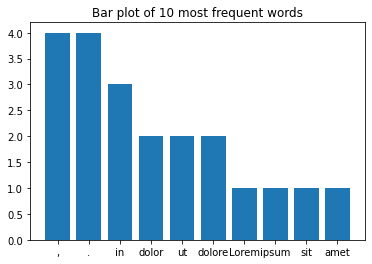

In [89]:
k = 10
plt.bar(*list(zip(*FreqDist(word_tokenize(text)).most_common(k))))
plt.title(f"Bar plot of {k} most frequent words")
plt.show()

In [90]:
print(set(stopwords.words("english")))

{'now', "don't", 'm', 'such', "that'll", 'themselves', "isn't", 'at', 'each', 'y', 'after', 'were', "you'll", 'with', 'further', 'aren', "haven't", 'this', 'how', 'between', 'he', "you'd", 'where', 'your', "aren't", 'wasn', 'out', 'she', 'about', 'off', 'against', 'in', 'than', 'ma', 'we', 're', 'whom', 'for', 'under', 'any', 'ain', 'what', 've', 'are', 'who', 'being', 'them', 'haven', 'wouldn', "mustn't", 'here', 'shouldn', 'an', 'very', "hasn't", 'needn', 'is', 'not', "couldn't", 'as', 'that', "you've", 'more', 'there', 'mustn', 'these', 'some', 'because', 'him', 'ourselves', 'while', 'didn', 'am', "needn't", 'yourselves', 'my', 'has', 'only', 'a', 'ours', 'most', 'but', 'itself', 'then', 'too', 'once', 'couldn', "shouldn't", 'until', 'o', 'or', 'into', 'me', 'hasn', 'which', 'own', 'd', 'nor', 'do', 'during', 'had', 'those', 'shan', "weren't", 'below', 'few', 'through', 'll', 'our', "mightn't", 'was', 'the', 'if', 'herself', 'and', 'by', 'to', 'yours', 't', "should've", 'you', 'her'

In [91]:
def filter_stopword(tokenized_text):
  stop_words = set(stopwords.words("english"))
  return list(filter(lambda x: x not in stop_words, tokenized_text))

speech = "My fellow Americans: Four years ago, we launched a great national effort to rebuild our country, to renew its spirit, and to restore the allegiance of this government to its citizens. In short, we embarked on a mission to make America great again — for all Americans. As I conclude my term as the 45th President of the United States, I stand before you truly proud of what we have achieved together. We did what we came here to do — and so much more."
print(filter_stopword(word_tokenize(speech)))

['My', 'fellow', 'Americans', ':', 'Four', 'years', 'ago', ',', 'launched', 'great', 'national', 'effort', 'rebuild', 'country', ',', 'renew', 'spirit', ',', 'restore', 'allegiance', 'government', 'citizens', '.', 'In', 'short', ',', 'embarked', 'mission', 'make', 'America', 'great', '—', 'Americans', '.', 'As', 'I', 'conclude', 'term', '45th', 'President', 'United', 'States', ',', 'I', 'stand', 'truly', 'proud', 'achieved', 'together', '.', 'We', 'came', '—', 'much', '.']


## Stemmer and Lemmatizer

In [92]:
lem = WordNetLemmatizer()
ps = PorterStemmer()

filtered_speech = filter_stopword(word_tokenize(speech))
print(list(map(ps.stem, filtered_speech)))
print(list(map(lem.lemmatize, filtered_speech)))

['My', 'fellow', 'american', ':', 'four', 'year', 'ago', ',', 'launch', 'great', 'nation', 'effort', 'rebuild', 'countri', ',', 'renew', 'spirit', ',', 'restor', 'allegi', 'govern', 'citizen', '.', 'In', 'short', ',', 'embark', 'mission', 'make', 'america', 'great', '—', 'american', '.', 'As', 'I', 'conclud', 'term', '45th', 'presid', 'unit', 'state', ',', 'I', 'stand', 'truli', 'proud', 'achiev', 'togeth', '.', 'We', 'came', '—', 'much', '.']
['My', 'fellow', 'Americans', ':', 'Four', 'year', 'ago', ',', 'launched', 'great', 'national', 'effort', 'rebuild', 'country', ',', 'renew', 'spirit', ',', 'restore', 'allegiance', 'government', 'citizen', '.', 'In', 'short', ',', 'embarked', 'mission', 'make', 'America', 'great', '—', 'Americans', '.', 'As', 'I', 'conclude', 'term', '45th', 'President', 'United', 'States', ',', 'I', 'stand', 'truly', 'proud', 'achieved', 'together', '.', 'We', 'came', '—', 'much', '.']


In [93]:
print(nltk.pos_tag(word_tokenize(text)))
print(nltk.pos_tag(filtered_speech))

[('Lorem', 'NNP'), ('ipsum', 'NN'), ('dolor', 'NN'), ('sit', 'NN'), ('amet', 'NN'), (',', ','), ('consectetur', 'NN'), ('adipiscing', 'VBG'), ('elit', 'NN'), (',', ','), ('sed', 'VBN'), ('do', 'VBP'), ('eiusmod', 'VB'), ('tempor', 'VB'), ('incididunt', 'NN'), ('ut', 'JJ'), ('labore', 'NN'), ('et', 'NN'), ('dolore', 'NN'), ('magna', 'NN'), ('aliqua', 'NN'), ('.', '.'), ('Ut', 'NNP'), ('enim', 'JJ'), ('ad', 'NN'), ('minim', 'NN'), ('veniam', 'NN'), (',', ','), ('quis', 'JJ'), ('nostrud', 'JJ'), ('exercitation', 'NN'), ('ullamco', 'JJ'), ('laboris', 'NN'), ('nisi', 'JJ'), ('ut', 'JJ'), ('aliquip', 'NN'), ('ex', 'NN'), ('ea', 'FW'), ('commodo', 'NN'), ('consequat', 'NN'), ('.', '.'), ('Duis', 'NNP'), ('aute', 'JJ'), ('irure', 'NN'), ('dolor', 'NN'), ('in', 'IN'), ('reprehenderit', 'NN'), ('in', 'IN'), ('voluptate', 'NN'), ('velit', 'NN'), ('esse', 'NN'), ('cillum', 'NN'), ('dolore', 'NN'), ('eu', 'JJ'), ('fugiat', 'NN'), ('nulla', 'NN'), ('pariatur', 'NN'), ('.', '.'), ('Excepteur', 'NNP')

## Test Sentiment Analysis

In [94]:
data = pd.read_csv("https://raw.githubusercontent.com/Prashantgupta-bot/Twitter-Data-Set-for-Sentiment-Analysis/main/Twitter-DataSet.csv")
data

,Reviews,Sentiment
0,robbiebronniman sounds like a great night,1
1,damn the person who stolde my wallet may karma...,1
2,greetings from the piano bench photo,1
3,drewryanscott i love it i love you haha forget...,0
4,kissthestars pretty pretty pretty please pakid...,0
...,...,...
988,now i have no sky until monday,0
989,my hubby left early morning for a business tri...,0
990,poppygirlx of course you can good luck,1
991,time to revise bio sigh sad face,0


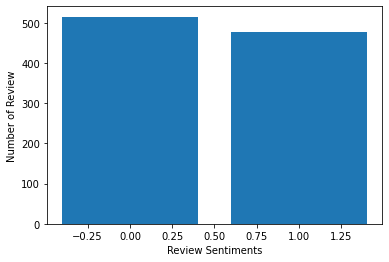

In [95]:
sentiment_count = data.groupby('Sentiment').count()
plt.bar(sentiment_count.index.values, sentiment_count['Reviews'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

In [96]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase = True, stop_words = 'english', ngram_range = (1,1), tokenizer = token.tokenize)
text_counts = cv.fit_transform(data['Reviews'])

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data['Reviews'])

In [97]:
(text_counts, text_tf)

(<993x3471 sparse matrix of type '<class 'numpy.int64'>'
 	with 6679 stored elements in Compressed Sparse Row format>,
 <993x3635 sparse matrix of type '<class 'numpy.float64'>'
 	with 11617 stored elements in Compressed Sparse Row format>)

In [98]:
# CountVectorizer
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, data['Sentiment'], test_size = 0.2, random_state = 1)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy with CountVectorizer:", accuracy_score(y_test, predicted))

# TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, data['Sentiment'], test_size = 0.2, random_state = 1)
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy with TfidfVectorizer:", accuracy_score(y_test, predicted))

MultinomialNB Accuracy with CountVectorizer: 0.6532663316582915
MultinomialNB Accuracy with TfidfVectorizer: 0.6080402010050251


## Final Exploration

In [99]:
regressors = [LinearRegression, DecisionTreeRegressor, DummyRegressor, RandomForestRegressor]
classifiers = [MultinomialNB, SGDClassifier, LogisticRegression, GaussianNB,
               DecisionTreeClassifier, DummyClassifier, RandomForestClassifier, AdaBoostClassifier,
               MLPClassifier, KNeighborsClassifier, SVC, GaussianProcessClassifier]

Testing MultinomialNB with CountVectorizer...
Testing MultinomialNB with TfidfVectorizer...
Testing SGDClassifier with CountVectorizer...
Testing SGDClassifier with TfidfVectorizer...
Testing LogisticRegression with CountVectorizer...
Testing LogisticRegression with TfidfVectorizer...
Testing GaussianNB with CountVectorizer...
Testing GaussianNB with TfidfVectorizer...
Testing DecisionTreeClassifier with CountVectorizer...
Testing DecisionTreeClassifier with TfidfVectorizer...
Testing DummyClassifier with CountVectorizer...
Testing DummyClassifier with TfidfVectorizer...
Testing RandomForestClassifier with CountVectorizer...
Testing RandomForestClassifier with TfidfVectorizer...
Testing AdaBoostClassifier with CountVectorizer...
Testing AdaBoostClassifier with TfidfVectorizer...
Testing MLPClassifier with CountVectorizer...
Testing MLPClassifier with TfidfVectorizer...
Testing KNeighborsClassifier with CountVectorizer...
Testing KNeighborsClassifier with TfidfVectorizer...
Testing SVC 

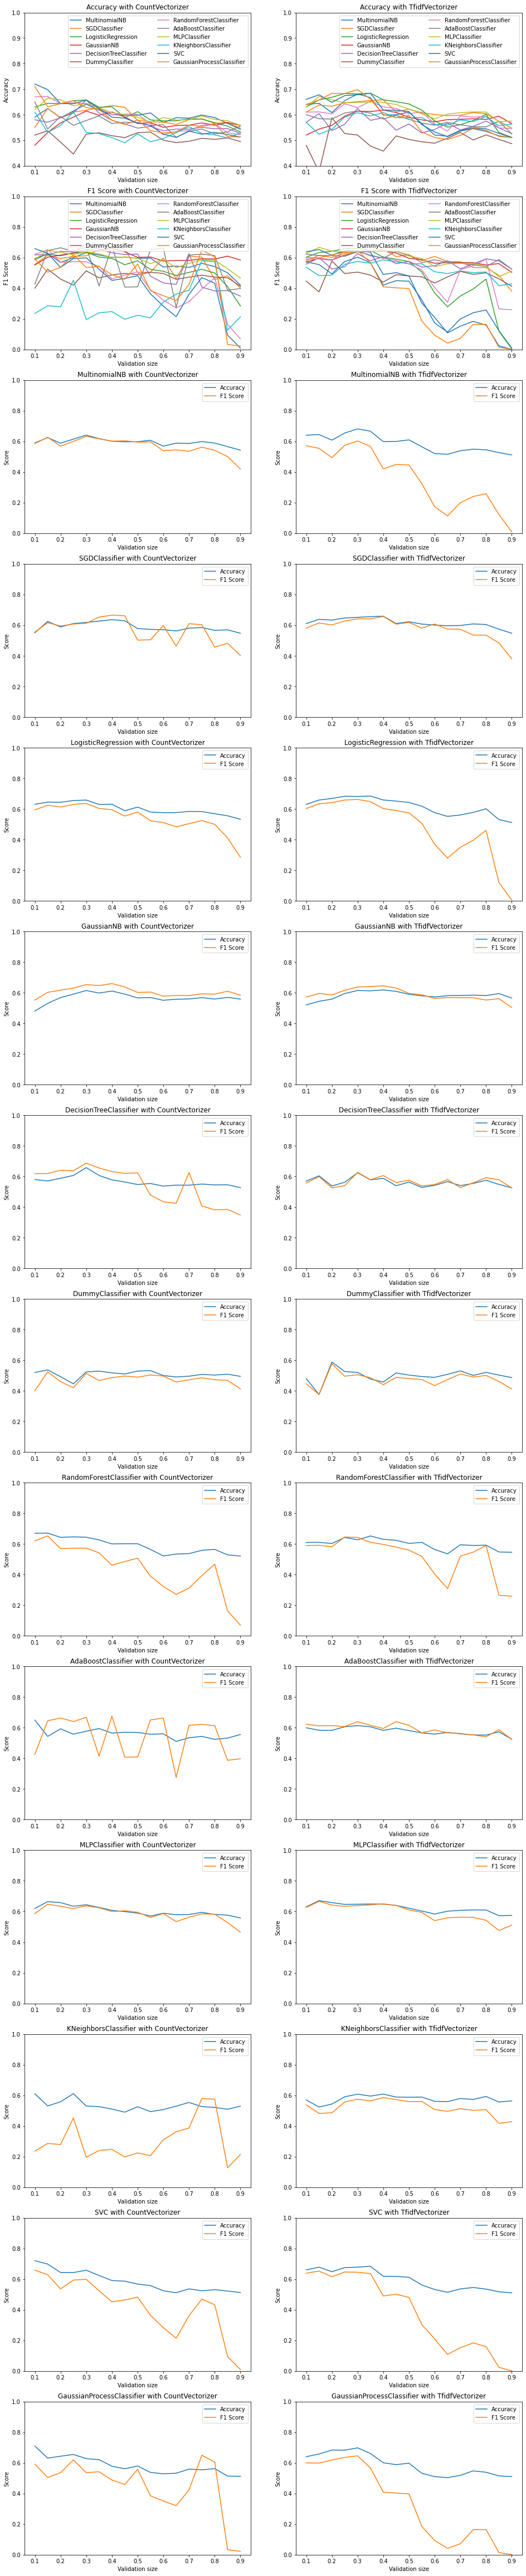

In [109]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

vectorizers = [text_counts, text_tf]
tx_title = ["CountVectorizer", "TfidfVectorizer"]
metrics = ["Accuracy", "F1 Score"]

fig, ax = plt.subplots(nrows = 2 + len(classifiers), ncols = 2, figsize = (16, 6*(2 + len(classifiers))))
for i in range(2):
  ax[0, i].set_ylim(0.4, 1)
  ax[1, i].set_ylim(0, 1)
  for j in range(2):
    ax[i, j].set_title(f"{metrics[i]} with {tx_title[j]}")

size_min, size_max = 10, 91

for classifier_idx in range(len(classifiers)):
  for tx in range(2):
    print(f"Testing {classifiers[classifier_idx].__name__} with {tx_title[tx]}...")
    accuracies, f1_scores = [], []
    for ts in range(size_min, size_max, 5):
      X_train, X_test, y_train, y_test = train_test_split(
          vectorizers[tx], data['Sentiment'], test_size = ts/100, random_state = 3244)
      try:
        clf = classifiers[classifier_idx]().fit(X_train, y_train)
        predicted = clf.predict(X_test)
      except:
        clf = classifiers[classifier_idx]().fit(X_train.toarray(), y_train)
        predicted = clf.predict(X_test.toarray())
      accuracies.append(accuracy_score(y_test, predicted))
      f1_scores.append(f1_score(y_test, predicted))
    scores = [accuracies, f1_scores]
    for m in range(2):
      ax[m, tx].plot(list(map(lambda x: x/100, range(size_min, size_max, 5))), scores[m], label = classifiers[classifier_idx].__name__)
      ax[m, tx].legend(ncol = 2)
      ax[m, tx].set_xlabel("Validation size")
      ax[m, tx].set_ylabel(metrics[m])
      ax[2 + classifier_idx, tx].plot(list(map(lambda x: x/100, range(size_min, size_max, 5))), scores[m], label = metrics[m])
    ax[2 + classifier_idx, tx].set_title(f"{classifiers[classifier_idx].__name__} with {tx_title[tx]}")
    ax[2 + classifier_idx, tx].legend()
    ax[2 + classifier_idx, tx].set_xlabel("Validation size")
    ax[2 + classifier_idx, tx].set_ylabel("Score")
    ax[2 + classifier_idx, tx].set_ylim(0, 1)
plt.show()